# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIT/1_proyecto /foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Checking the number of rows (orders) and columns (features) in the dataset
df.shape

(1898, 9)

#### Observations:
He dataset contains 1898 rows and 9 columns. This means there are 1898 recorded orders, and each order has 9 features or variables (such as restaurant name, cuisine type, cost, rating, etc.).

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The order_id column is of type int64 (integer).

The customer_id column is of type int64 (integer).

The restaurant_name column is of type object (text).

The cuisine_type column is of type object (text).

The cost_of_the_order column is of type float64 (decimal number).

The day_of_the_week column is of type object (text).

The rating column is of type object (text), though it should be numerical.

The food_preparation_time column is of type int64 (integer).

The delivery_time column is of type int64 (integer).

No missing values were found in any of the columns, which simplifies further analysis.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Convert 'order_id' and 'customer_id' to categorical (object)
df['order_id'] = df['order_id'].astype('object')
df['customer_id'] = df['customer_id'].astype('object')


In [ ]:
# Check unique values in 'rating' column
df['rating'].unique()


array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
# Count the number of rows where 'rating' is 'Not given'
not_given_count = df[df['rating'] == 'Not given'].shape[0]
print(f"'Not given' appears in {not_given_count} rows.")

'Not given' appears in 736 rows.


In [ ]:
# Replace 'Not given' values in the 'rating' column with NaN (to treat them as missing values)
df['rating'] = df['rating'].replace('Not given', np.nan)

# Convert the 'rating' column from object type to numeric type
df['rating'] = pd.to_numeric(df['rating'])

# Fill missing values in 'rating' with the median using the dictionary-based approach
df.fillna({'rating': df['rating'].median()}, inplace=True)


In [ ]:
# Convert 'rating' to integer type
df['rating'] = df['rating'].astype(int)

#### Observations:

1. Converting 'order_id' and 'customer_id' to categorical (object):
First, I converted the columns order_id and customer_id from numeric types to categorical using astype('object'). This was necessary because these columns represent unique identifiers, and they don't need to be treated as numeric for any analysis. By converting them to categorical types, I ensured they would be handled properly in future analyses.

2. Checking unique values in 'rating':
I used the df['rating'].unique() command to inspect the unique values present in the rating column. Upon reviewing the output, I noticed the value 'Not given', which indicated that some customers had not provided a rating. This value could not be used in its current form for analysis, so I had to treat it as missing data.

3. Counting rows with 'Not given':
To understand the extent of the missing data, I counted how many rows contained the value 'Not given'. The result showed that 736 rows (around 38.76% of the dataset) had 'Not given' as the rating. Since this was a significant portion of the data, I decided that dropping these rows would not be ideal. Instead, I opted to impute the missing values.

4. Replacing 'Not given' with NaN:
I replaced the 'Not given' values in the rating column with NaN using df['rating'].replace('Not given', np.nan). This allowed me to treat these values as missing, making it easier to apply an imputation strategy.

5. Converting 'rating' to numeric:
After replacing 'Not given' with NaN, I converted the rating column from an object type to a numeric type using pd.to_numeric(df['rating']). This conversion enabled me to perform numeric operations, such as calculating the median, which would be used for imputing the missing values.

6. Filling missing values with the median:
Given the large percentage of missing values in the rating column, I decided to impute the missing values with the median. The median is less affected by outliers and provides a robust approach for imputation, especially when dealing with skewed data. I used the df.fillna({'rating': df['rating'].median()}, inplace=True) command to replace the missing values with the median of the column.

7. Converting 'rating' to integer:
Lastly, I converted the rating column to an integer type using df['rating'].astype(int). Since ratings are whole numbers between 0 and 5, converting them to integers was the most appropriate choice for maintaining consistency in the data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Check the statistical summary of the 'food_preparation_time' column
prep_time_stats = df['food_preparation_time'].describe()
print(prep_time_stats)




count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64


In [ ]:
# Extract the minimum, average, and maximum preparation times
min_prep_time = prep_time_stats['min']
avg_prep_time = prep_time_stats['mean']
max_prep_time = prep_time_stats['max']

# Print the results
print(f"Minimum preparation time: {min_prep_time} minutes")
print(f"Average preparation time: {avg_prep_time} minutes")
print(f"Maximum preparation time: {max_prep_time} minutes")

Minimum preparation time: 20.0 minutes
Average preparation time: 27.371970495258168 minutes
Maximum preparation time: 35.0 minutes


#### Observations:
The minimum preparation time recorded is 20 minutes.

The average preparation time recorded is 27.37 minutes.

The maximum preparation time recorded is 35 minutes.

### **Question 5:** How many orders are not rated?

#### Observations:

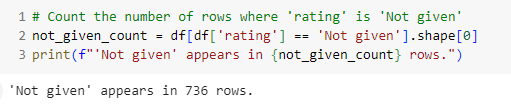

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

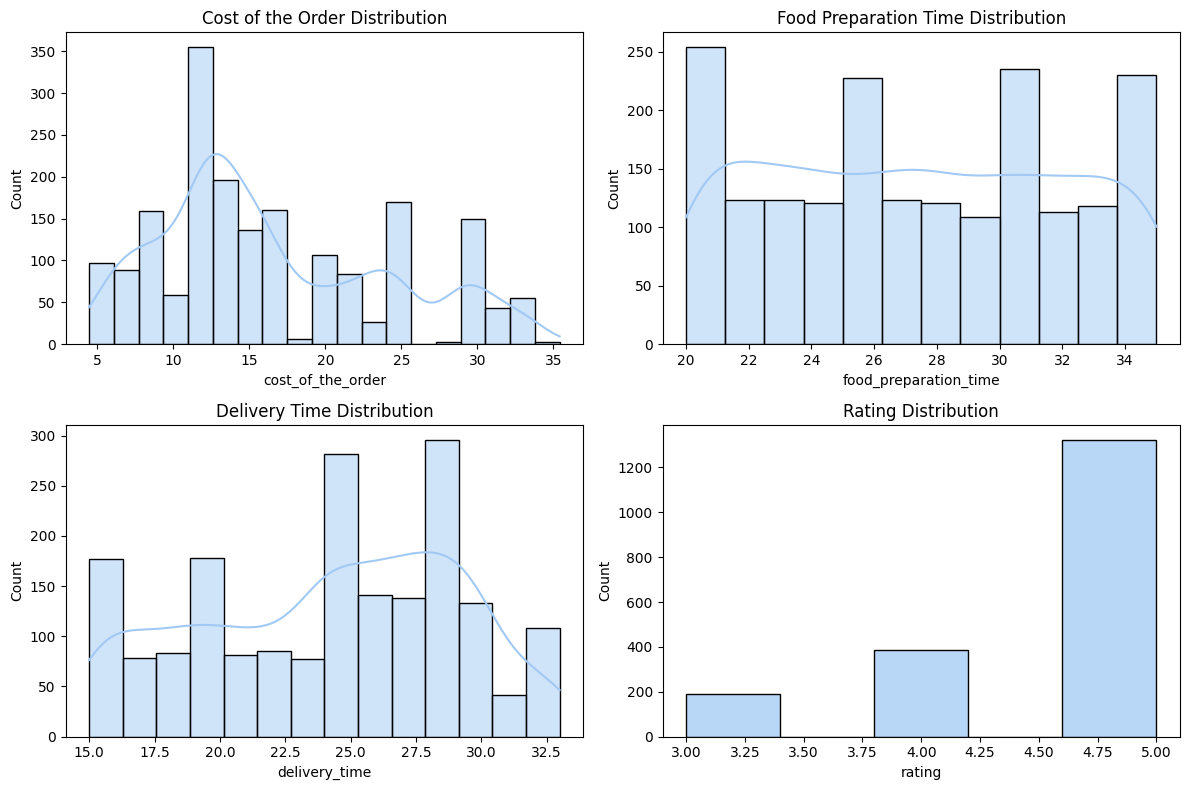

In [ ]:
# Histograms for each continuous variable
plt.figure(figsize=(12, 8))

# Cost of the order
plt.subplot(2, 2, 1)
sns.histplot(df['cost_of_the_order'], kde=True)
plt.title('Cost of the Order Distribution')

# Food preparation time
plt.subplot(2, 2, 2)
sns.histplot(df['food_preparation_time'], kde=True)
plt.title('Food Preparation Time Distribution')

# Delivery time
plt.subplot(2, 2, 3)
sns.histplot(df['delivery_time'], kde=True)
plt.title('Delivery Time Distribution')

# Rating
plt.subplot(2, 2, 4)
sns.histplot(df['rating'], bins=5, kde=False)
plt.title('Rating Distribution')

plt.tight_layout()
plt.show()





#Observation

##Cost of the Order Distribution:

The distribution of the order cost appears to be slightly skewed to the right. Most orders cost between 10 and 20 monetary units, while fewer orders have a cost exceeding 30 units.

##Food Preparation Time Distribution:

The food preparation time seems to be uniformly distributed between 20 and 34 minutes, with a slight concentration around 20 and 30 minutes.

##Rating Distribution:

Most ratings fall within the high range (between 4.5 and 5), indicating that customers are generally satisfied with their orders. Low ratings are very scarce.

##Delivery Time Distribution:

Delivery times show several distributions with peaks around 20, 25, and 30 minutes, suggesting that there are recurring patterns in delivery times. This could be due to similar distances between the restaurant and customers or logistical factors resulting in consistent delivery times.

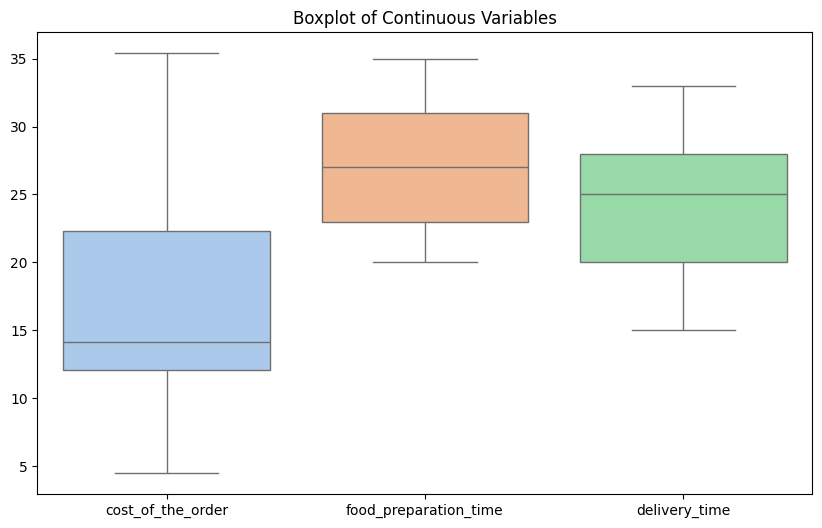

***************cost_of_the_order****************************
Q1 (25%): 12.08
Q2 (Median - 50%): 14.14
Q3 (75%): 22.2975
***************food_preparation_time**********************
Q1 (25%): 23.0
Q2 (Median - 50%): 27.0
Q3 (75%): 31.0
***************delivery_time**********************
Q1 (25%): 23.0
Q2 (Median - 50%): 27.0
Q3 (75%): 31.0


In [ ]:
# Boxplots to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']])
plt.title('Boxplot of Continuous Variables')
plt.show()

print('***************cost_of_the_order****************************')
# Calculate Q1 (First quartile - 25%)
Q1_cost_order = df['cost_of_the_order'].quantile(0.25)

# Calculate Q2 (Median - 50%)
Q2_cost_order = df['cost_of_the_order'].quantile(0.50)

# Calculate Q3 (Third quartile - 75%)
Q3_cost_order = df['cost_of_the_order'].quantile(0.75)

# Print the results
print(f"Q1 (25%): {Q1_cost_order}")
print(f"Q2 (Median - 50%): {Q2_cost_order}")
print(f"Q3 (75%): {Q3_cost_order}")

print('***************food_preparation_time**********************')

# Calculate Q1 (First quartile - 25%)
Q1_preparation_time = df['food_preparation_time'].quantile(0.25)

# Calculate Q2 (Median - 50%)
Q2_preparation_time = df['food_preparation_time'].quantile(0.50)

# Calculate Q3 (Third quartile - 75%)
Q3_preparation_time = df['food_preparation_time'].quantile(0.75)

# Print the results
print(f"Q1 (25%): {Q1_preparation_time}")
print(f"Q2 (Median - 50%): {Q2_preparation_time}")
print(f"Q3 (75%): {Q3_preparation_time}")

print('***************delivery_time**********************')

# Calculate Q1 (First quartile - 25%)
Q1_delivery_time = df['food_preparation_time'].quantile(0.25)

# Calculate Q2 (Median - 50%)
Q2_delivery_time = df['food_preparation_time'].quantile(0.50)

# Calculate Q3 (Third quartile - 75%)
Q3_delivery_time = df['food_preparation_time'].quantile(0.75)

# Print the results
print(f"Q1 (25%): {Q1_delivery_time}")
print(f"Q2 (Median - 50%): {Q2_delivery_time}")
print(f"Q3 (75%): {Q3_delivery_time}")



#Observation

##Cost_of_the_order boxplot:

Q1 (25%): The first quartile is 12.08, indicating that 25% of the orders have a cost equal to or less than this value.
Q2 (Median - 50%): The median is 14.14, meaning that 50% of the orders have a cost equal to or less than this value, representing the central cost.
Q3 (75%): The third quartile is 22.30, showing that 75% of the orders have a cost equal to or less than this value.
IQR (Interquartile Range): The IQR, which represents the range where the central 50% of orders lie, spans from 12.08 to 22.30.

##Food_preparation_time boxplot:

Q1 (25%): The first quartile is 23 minutes, indicating that 25% of the orders have a preparation time equal to or less than this value.
Q2 (Median - 50%): The median is 27 minutes, meaning that 50% of the orders have a preparation time equal to or less than this value.
Q3 (75%): The third quartile is 31 minutes, showing that 75% of the orders have a preparation time equal to or less than this value.
IQR (Interquartile Range): The IQR for the preparation time ranges from 23 to 31 minutes, reflecting consistency in preparation times.

##Delivery_time boxplot:

Q1 (25%): The first quartile is 23 minutes, indicating that 25% of the orders have a delivery time equal to or less than this value.
Q2 (Median - 50%): The median is 27 minutes, meaning that 50% of the orders have a delivery time equal to or less than this value.
Q3 (75%): The third quartile is 31 minutes, showing that 75% of the orders have a delivery time equal to or less than this value.
IQR (Interquartile Range): The IQR for the delivery time also ranges from 23 to 31 minutes, showing a similar trend to the preparation times.


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


<ipython-input-40-d45fe4741477>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_restaurants.values, y=top_5_restaurants.index, palette="pastel")


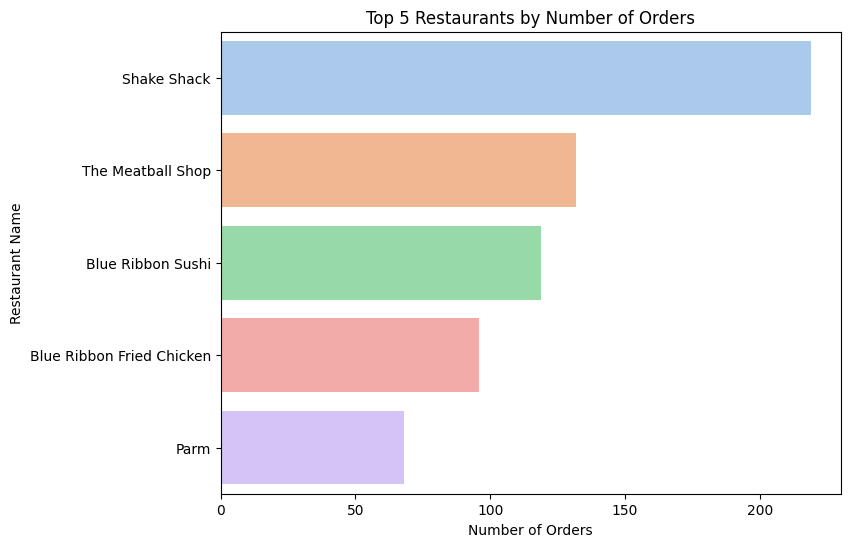

In [ ]:
# Count the number of orders per restaurant
restaurant_order_counts = df['restaurant_name'].value_counts()

# Select the top 5 restaurants
top_5_restaurants = restaurant_order_counts.head(5)

print(top_5_restaurants)

sns.set_palette("pastel")


plt.figure(figsize=(8, 6))
sns.barplot(x=top_5_restaurants.values, y=top_5_restaurants.index, palette="pastel")
plt.title('Top 5 Restaurants by Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Restaurant Name')
plt.show()





#### Observations on the Top 5 Restaurants by Number of Orders:

####1. Shake Shack ranks first with 219 orders, making it the most requested restaurant. This could be due to its popularity or accessibility through the app.

###2. The Meatball Shop is in second place, with 132 orders, indicating significant demand, although much lower compared to Shake Shack.

###3. Blue Ribbon Sushi follows closely in third place with 119 orders, suggesting that Japanese cuisine is also quite popular among app users.

###4. Blue Ribbon Fried Chicken ranks fourth with 96 orders, showing that fried chicken fast food options also have a strong presence.

###5. Parm comes in fifth with 68 orders, making it the least requested restaurant among the top five.

###Conclusion

- The two most popular restaurants (Shake Shack and The Meatball Shop) show a significant gap in the number of orders compared to the other three, suggesting that Shake Shack is a clear favorite among users.

- American and Japanese cuisines appear to have a strong presence in users' preferences, as reflected in the orders for Shake Shack and Blue Ribbon Sushi.


### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# Filter orders placed on weekends
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# Count the number of orders per cuisine type on weekends
cuisine_counts_weekends = weekend_orders['cuisine_type'].value_counts()

# Identify the most popular cuisine on weekends
most_popular_cuisine = cuisine_counts_weekends.idxmax()
most_popular_count = cuisine_counts_weekends.max()


print("The most popular cuisine on weekends is:", most_popular_cuisine)
print(f"It received {most_popular_count} orders.")


The most popular cuisine on weekends is: American
It received 415 orders.


<ipython-input-42-6f319aa5b9bc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=weekend_orders, x='cuisine_type', palette='pastel')


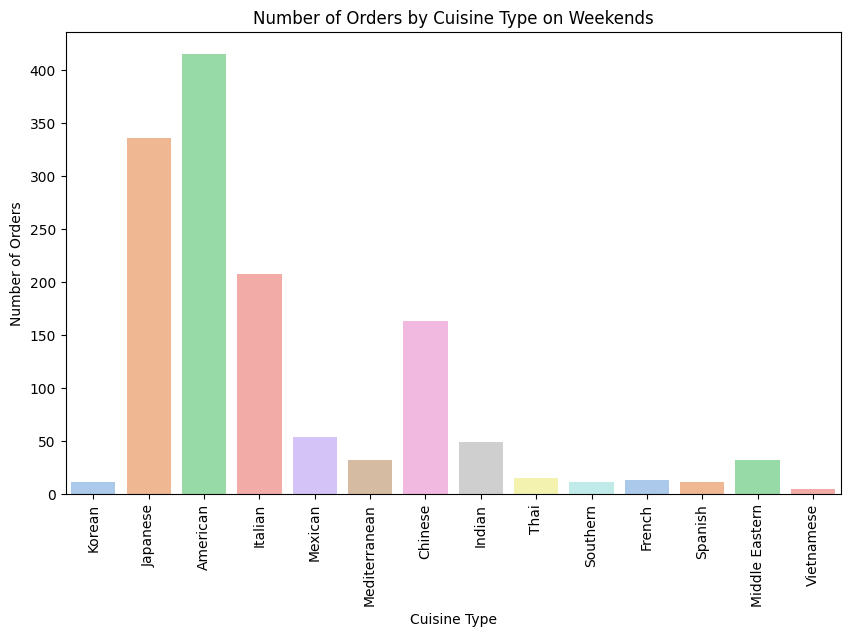

In [ ]:
# Filter orders placed on weekends
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

plt.figure(figsize=(10, 6))
sns.countplot(data=weekend_orders, x='cuisine_type', palette='pastel')

plt.title('Number of Orders by Cuisine Type on Weekends')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)  # Rotate x-axis labels 90 degrees


plt.show()

#### Observations:

1. American cuisine is the most popular on weekends, with over 400 orders, making it the preferred choice among users during leisure days.

2. Japanese cuisine ranks second, with a significant number of orders exceeding 300, indicating strong user preference.

3. Italian cuisine also shows high demand on weekends, recording more than 200 orders, suggesting it is a popular choice among users.

4. Chinese and Mexican cuisines follow with a moderate number of orders, reflecting consistent but more specific demand.

5. Other cuisines, such as Korean, Mediterranean, and Middle Eastern, recorded a lower number of orders, indicating less preference during weekends.

The concentration of orders in a few cuisines (American, Japanese, and Italian) suggests clear consumption patterns on weekends, possibly related to cultural preferences and the availability of these options on the platform.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Count the total number of orders
total_orders = df.shape[0]

# Count the orders with cost greater than 20 dollars
orders_above_20 = df[df['cost_of_the_order'] > 20].shape[0]

#  Calculate the percentage
percentage_above_20 = (orders_above_20 / total_orders) * 100


print(f"The percentage of orders that cost more than 20 dollars is: {percentage_above_20:.2f}%")


The percentage of orders that cost more than 20 dollars is: 29.24%


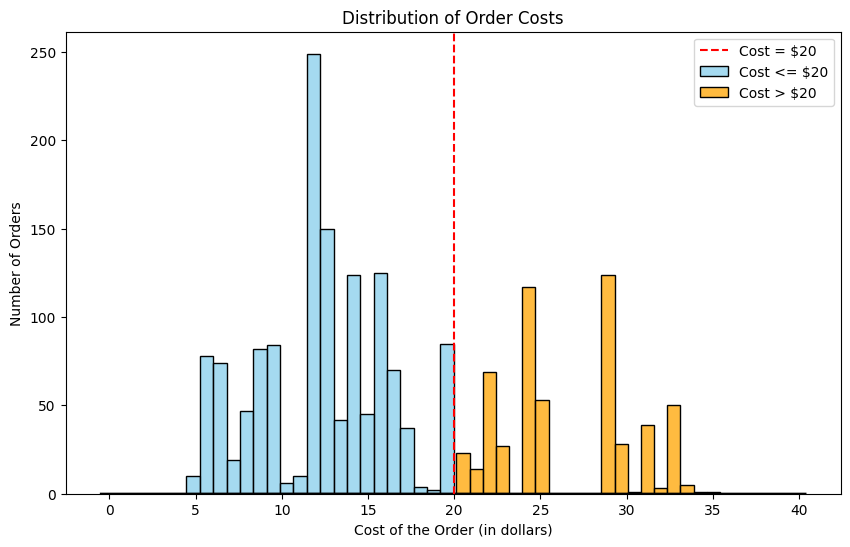

In [ ]:
# Create a mask to separate orders above and below 20 dollars
above_20 = df[df['cost_of_the_order'] > 20]
below_20 = df[df['cost_of_the_order'] <= 20]


plt.figure(figsize=(10, 6))


sns.histplot(below_20['cost_of_the_order'], bins=20, kde=False, color='skyblue', label='Cost <= $20')


sns.histplot(above_20['cost_of_the_order'], bins=20, kde=False, color='orange', label='Cost > $20')

sns.kdeplot(df['cost_of_the_order'], color='black')


plt.title('Distribution of Order Costs')
plt.xlabel('Cost of the Order (in dollars)')
plt.ylabel('Number of Orders')

plt.axvline(x=20, color='red', linestyle='--', label='Cost = $20')


plt.legend()

plt.show()

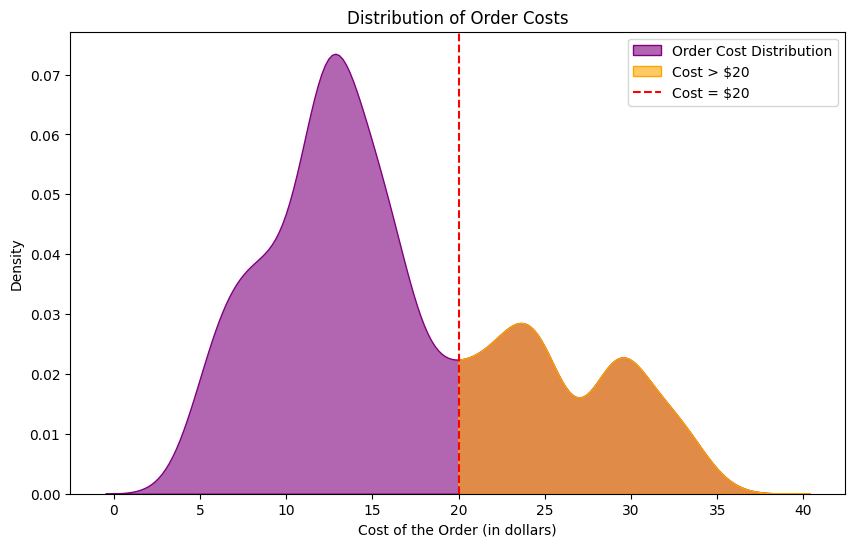

In [ ]:
# Create the figure
plt.figure(figsize=(10, 6))


sns.kdeplot(df['cost_of_the_order'], fill=True, color='purple', alpha=0.6, label='Order Cost Distribution')

x = np.linspace(20, df['cost_of_the_order'].max(), 100)
sns.kdeplot(df['cost_of_the_order'], fill=True, color='orange', alpha=0.6, label='Cost > $20', clip=(20, None))

plt.title('Distribution of Order Costs')
plt.xlabel('Cost of the Order (in dollars)')
plt.ylabel('Density')


plt.axvline(x=20, color='red', linestyle='--', label='Cost = $20')

plt.legend()

plt.show()


#### Observations:

1. Orders costing more than $20 make up 29.24% of the total, as highlighted by the shaded orange area in the KDE plot.

2. The majority of orders are concentrated below $20, as shown by the sky-blue section in the histogram, indicating that lower-cost orders are more frequent.

3. The vertical red dashed line at $20 effectively separates the two segments of the distribution, emphasizing the threshold.

4. The KDE plot reveals two distinct peaks:
- The first peak appears between $10 and  $15, representing the most frequent order range.
- The second peak is located between $25 and $30, reflecting a smaller but significant cluster of higher-cost orders.

5. The distribution tail in the KDE plot extends beyond $35, indicating a few high-cost outliers in the dataset.

6. These visualizations suggest that while most customers prefer lower-cost orders, a substantial proportion (29.24%) are willing to pay more than $20, presenting an opportunity for premium offerings or targeted promotions.


### **Question 10**: What is the mean order delivery time?

In [ ]:
#  Calculate the mean delivery time
mean_delivery_time = df['delivery_time'].mean()

print(f"The mean order delivery time is: {mean_delivery_time:.2f} minutes")


The mean order delivery time is: 24.16 minutes


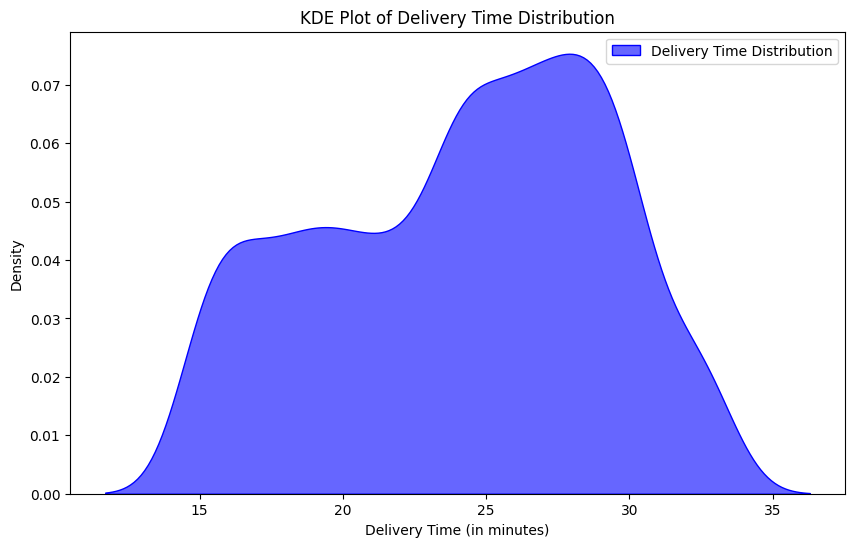

In [ ]:
# Create the figure
plt.figure(figsize=(10, 6))

sns.kdeplot(df['delivery_time'], fill=True, color='blue', alpha=0.6, label='Delivery Time Distribution')


plt.title('KDE Plot of Delivery Time Distribution')
plt.xlabel('Delivery Time (in minutes)')
plt.ylabel('Density')

plt.legend()
plt.show()

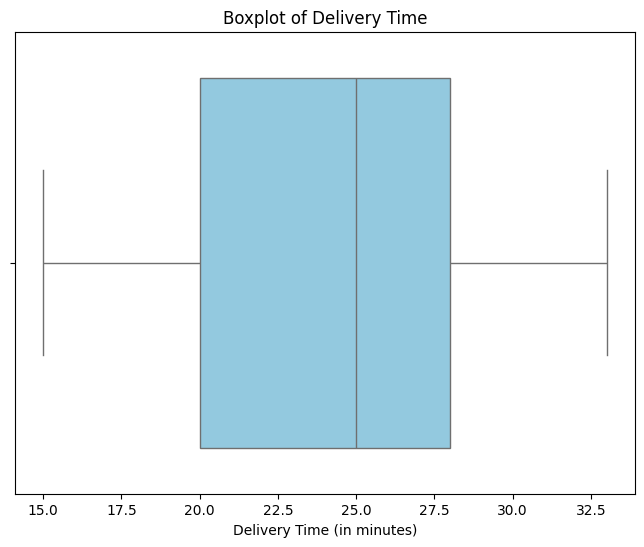

Q1 (25th percentile): 20.0
Q3 (75th percentile): 28.0
Interquartile Range (IQR): 8.0


In [ ]:
# Create the figure
plt.figure(figsize=(8, 6))


sns.boxplot(x=df['delivery_time'], color='skyblue')


plt.title('Boxplot of Delivery Time')
plt.xlabel('Delivery Time (in minutes)')


plt.show()

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['delivery_time'].quantile(0.25)
Q3 = df['delivery_time'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1


print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"Interquartile Range (IQR): {IQR}")


#### Observations:

Based on the analysis of the mean, KDE plot, and boxplot, we conclude that the average delivery time is 24.16 minutes. The interquartile range (IQR) shows that the middle 50% of the delivery times fall between 20 and 28 minutes, indicating that most orders are delivered within this range. The analysis suggests that the delivery service is both consistent and efficient, with only a few deliveries taking longer than 30 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# Count the number of orders per customer
customer_order_counts = df['customer_id'].value_counts()

top_3_customers = customer_order_counts.head(3)


print("Top 3 most frequent customers and their order counts:")
print(top_3_customers)


Top 3 most frequent customers and their order counts:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


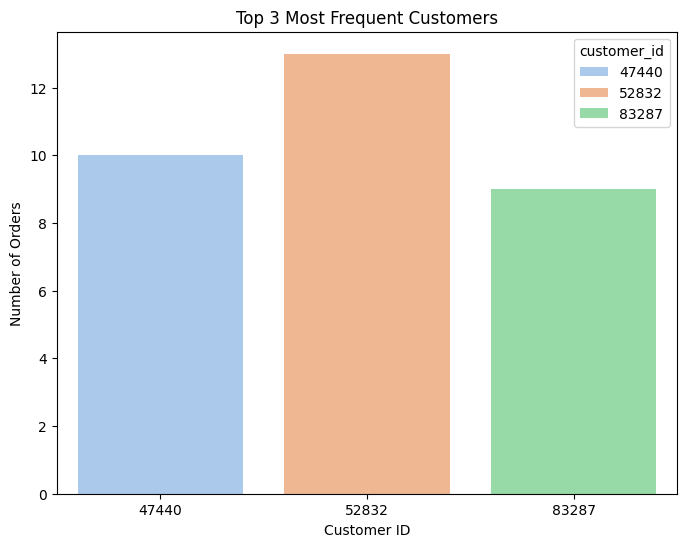

In [ ]:
# Prepare the data for plotting
top_3_customers_df = top_3_customers.reset_index()
top_3_customers_df.columns = ['customer_id', 'num_orders']

plt.figure(figsize=(8, 6))
sns.barplot(data=top_3_customers_df, x='customer_id', y='num_orders', hue='customer_id', palette='pastel', dodge=False)


plt.title('Top 3 Most Frequent Customers')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')

plt.show()



#### Observations:

Based on the analysis, the top 3 most frequent customers and the number of orders they placed are:

- Customer with ID 52832: Placed 13 orders.

- Customer with ID 47440: Placed 10 orders.
- Customer with ID 83287: Placed 9 orders.

These three customers are the most frequent users on the platform, making them ideal candidates to receive 20% discount vouchers as a reward for their loyalty. Offering these vouchers could encourage further engagement and help maintain their loyalty to the platform.



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

                       cost_of_the_order  food_preparation_time  \
cost_of_the_order               1.000000               0.041527   
food_preparation_time           0.041527               1.000000   
delivery_time                  -0.029949               0.011094   
rating                          0.002335              -0.005422   

                       delivery_time    rating  
cost_of_the_order          -0.029949  0.002335  
food_preparation_time       0.011094 -0.005422  
delivery_time               1.000000 -0.005722  
rating                     -0.005722  1.000000  


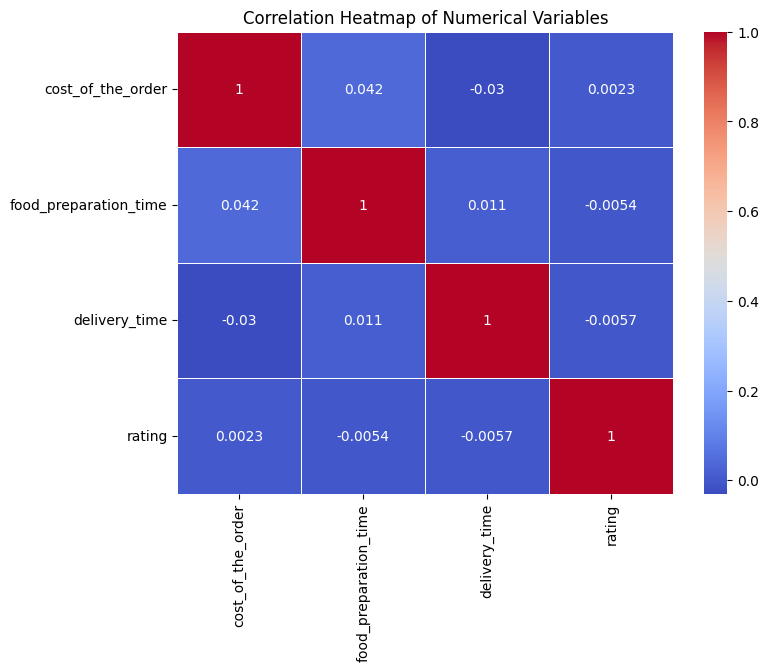

In [ ]:
# Create a correlation matrix for numerical variables
correlation_matrix = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']].corr()
print(correlation_matrix)
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)


plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


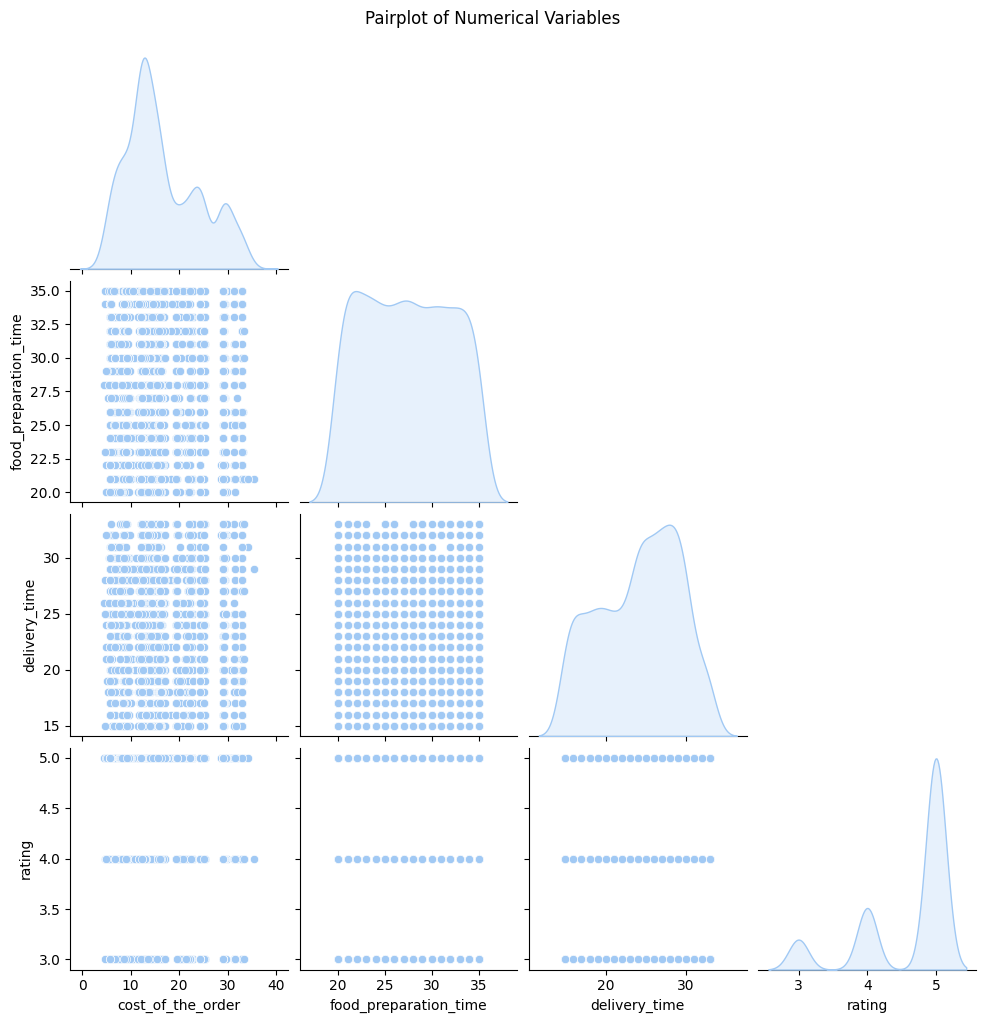

In [ ]:
# The pairplot
sns.pairplot(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']], diag_kind='kde', corner=True)

plt.suptitle('Pairplot of Numerical Variables', y=1.02)

plt.show()

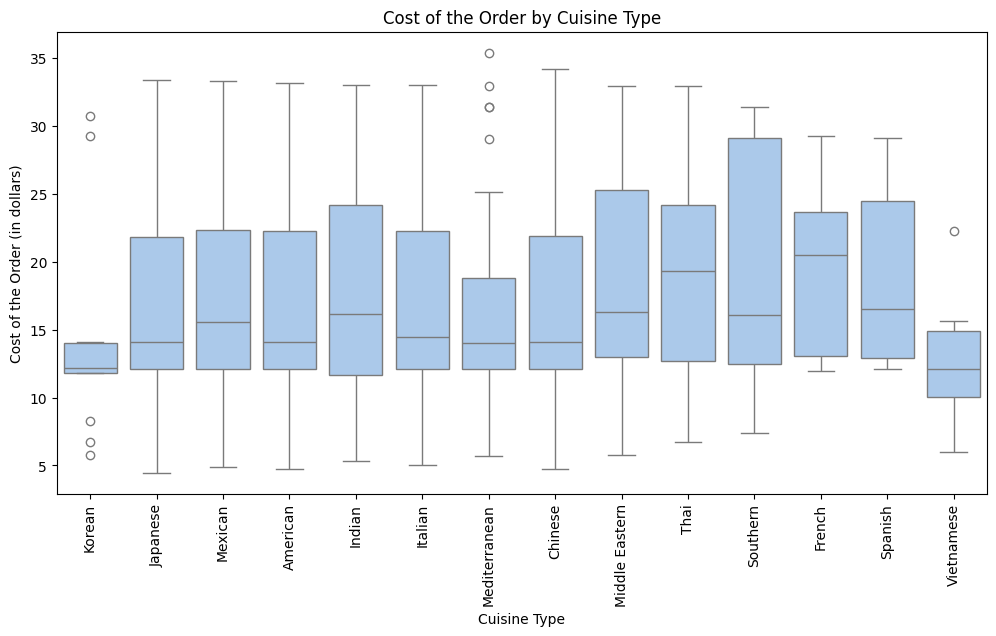

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.xticks(rotation=90)  # Rotar etiquetas para mejor visualización
plt.title('Cost of the Order by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order (in dollars)')
plt.show()



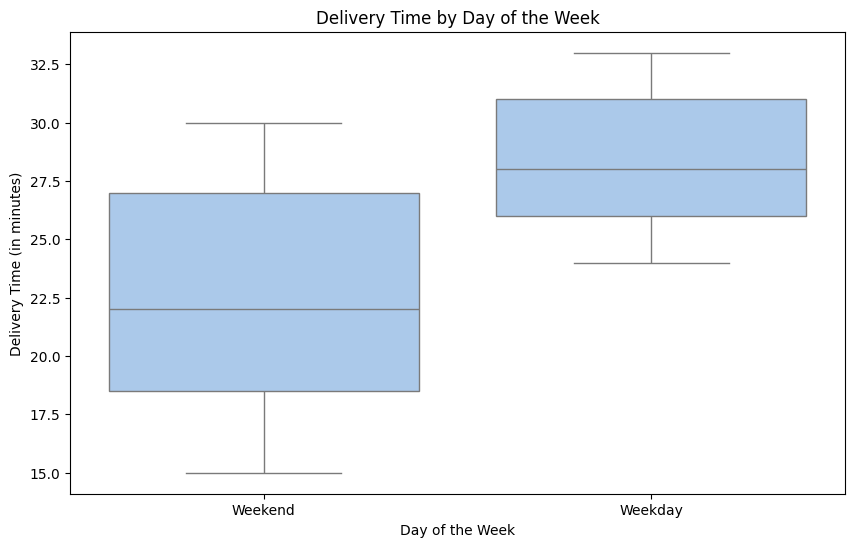

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.title('Delivery Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (in minutes)')
plt.show()


###Observation

#1. Correlation Analysis (Heatmap of Numerical Variables)
The correlation heatmap reveals the following insights:

- Weak correlations exist between all numerical variables. None show strong linear relationships.

- The highest correlation (though still very weak) is between order cost and food preparation time (0.042).

- delivery_time and rating are not significantly correlated with other variables, suggesting that customer ratings are not influenced by delivery or preparation times.

#2. Relationships Among Numerical Variables (Pairplot)
The pairplot confirms the lack of clear linear relationships between numerical variables:

- Data points are scattered without showing clear patterns.

- The individual distributions of variables like order cost and delivery time exhibit some clustering, but do not indicate strong correlations with other variables.

- Ratings tend to cluster at higher values, indicating that most customers are satisfied, regardless of order cost, preparation time, or delivery time.

#3. Relationship Between Order Cost and Cuisine Type (Boxplot)
The boxplot comparing cost_of_the_order by cuisine_type highlights some differences:

- Southern cuisine shows the highest cost range, with orders reaching up to 35.
Korean cuisine tends to be more affordable, with a median cost around 10.

- Other cuisines, such as Italian, Thai, and Indian, show more variability in cost, while Vietnamese cuisine has the lowest and least variable prices.

#4. Relationship Between Delivery Time and Day of the Week (Boxplot)
The boxplot comparing delivery_time across day_of_the_week reveals an interesting pattern:

- Weekday deliveries are, on average, longer (with a median of around 30 minutes) compared to weekend deliveries, where the median delivery time is around 22 minutes.

- This suggests that delivery times tend to be faster on weekends, possibly due to lighter traffic or fewer orders.

##Conclusion of the Multivariate Analysis:
Weak Relationships Among Numerical Variables:

- There are no significant correlations between order cost, preparation time, delivery time, and rating.

- Numerical variables appear to have minimal influence on each other.
Variability in Order Cost by Cuisine Type:

- Some cuisines, such as Southern and Italian, exhibit more variability in prices, while others, like Korean and Vietnamese, tend to have more affordable orders.

Differences in Delivery Time by Day of the Week:

- Delivery times are faster on weekends, which might reflect operational or demand-based patterns.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Grouping by restaurant to calculate the total number of ratings and the average rating
restaurant_agg = df.groupby('restaurant_name').agg(
    rating_count=('rating', 'count'),
    average_rating=('rating', 'mean')
).reset_index()

# Filtering restaurants with more than 50 ratings and an average rating greater than 4
eligible_restaurants = restaurant_agg[
    (restaurant_agg['rating_count'] > 50) &
    (restaurant_agg['average_rating'] > 4)
]

# Displaying the eligible restaurants
print("Restaurants eligible for the promotional offer:")
print(eligible_restaurants)


Restaurants eligible for the promotional offer:
               restaurant_name  rating_count  average_rating
20   Blue Ribbon Fried Chicken            96        4.552083
21           Blue Ribbon Sushi           119        4.521008
109                       Parm            68        4.500000
121           RedFarm Broadway            59        4.474576
122             RedFarm Hudson            55        4.490909
136                Shake Shack           219        4.561644
153          The Meatball Shop           132        4.689394


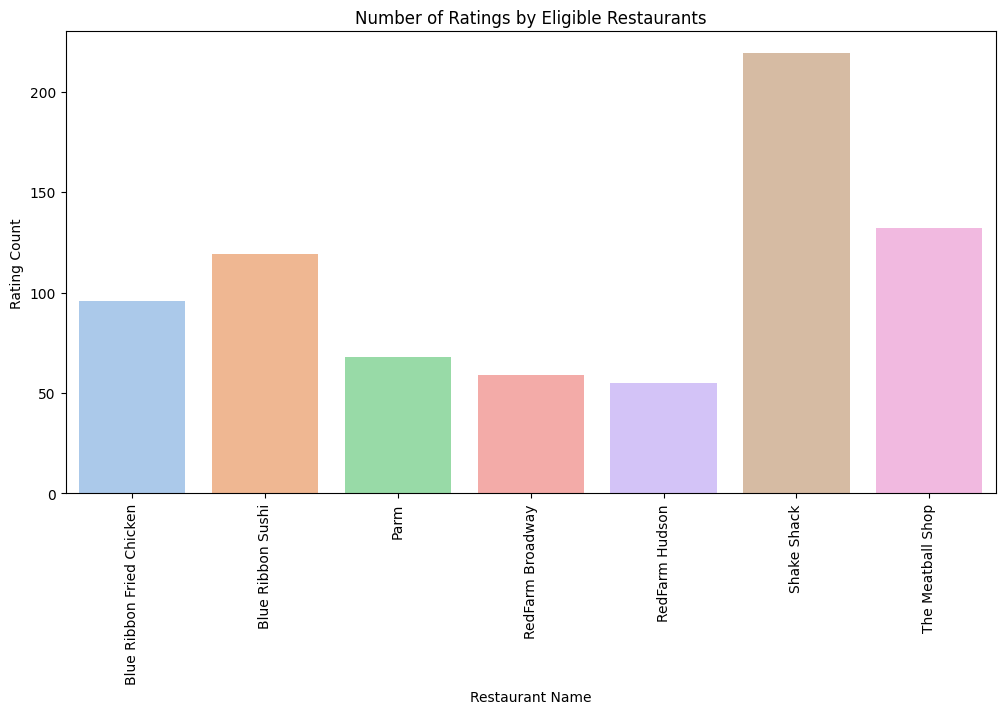

In [ ]:
# bar plot with the correct usage of hue and legend
plt.figure(figsize=(12, 6))
sns.barplot(
    x='restaurant_name',
    y='rating_count',
    data=eligible_restaurants,
    palette='pastel',
    hue='restaurant_name',
    dodge=False  # Avoid splitting bars by hue
)

plt.legend([], [], frameon=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)


plt.title('Number of Ratings by Eligible Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Rating Count')


plt.show()


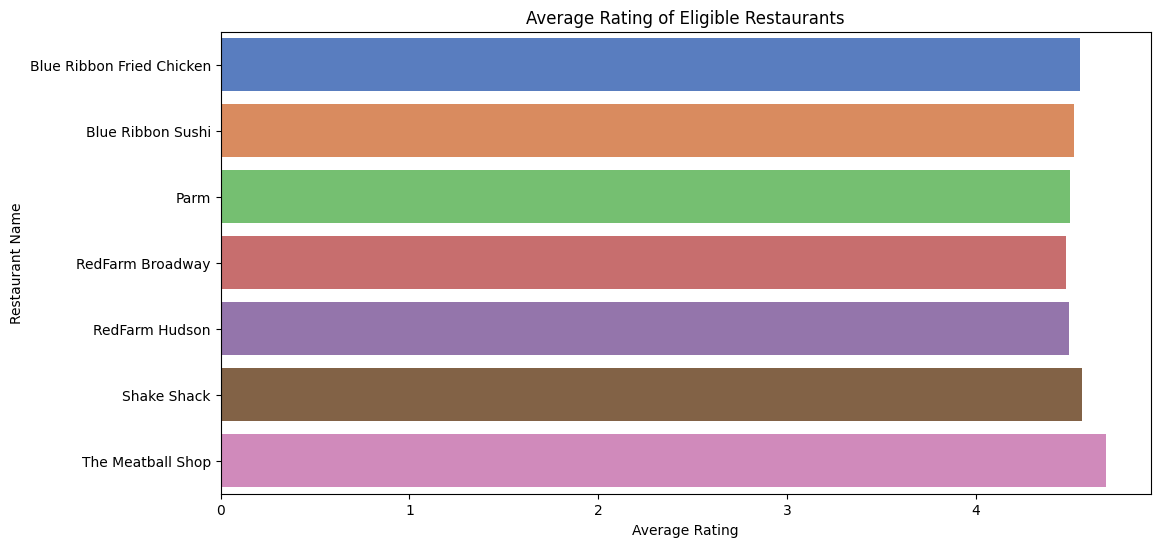

In [ ]:
# horizontal bar plot with the correct hue assignment
plt.figure(figsize=(12, 6))
sns.barplot(
    y='restaurant_name',
    x='average_rating',
    data=eligible_restaurants,
    hue='restaurant_name',
    palette='muted',
    dodge=False
)

plt.legend([], [], frameon=False)


plt.title('Average Rating of Eligible Restaurants')
plt.xlabel('Average Rating')
plt.ylabel('Restaurant Name')


plt.show()


#### Observations:

Based on the criteria—more than 50 ratings and an average rating above 4—the following restaurants qualify for the promotional offer:

1. Key Findings from the Data:
Number of Ratings (Bar Plot Analysis):

- Shake Shack leads with the highest number of ratings (219), indicating high customer engagement.

- The Meatball Shop follows with 132 ratings, showing it is also well-reviewed by customers.

- Other eligible restaurants, such as Blue Ribbon Sushi (119 ratings) and Blue Ribbon Fried Chicken (96 ratings), also demonstrate strong customer interest.

2. Average Rating (Horizontal Bar Plot Analysis):

- All the eligible restaurants have an average rating above 4, with The Meatball Shop achieving the highest average rating (4.69).

- Shake Shack has an average rating of 4.56, which aligns with its popularity among customers.


3. The other restaurants, such as Blue Ribbon Sushi and RedFarm Broadway, maintain average ratings above 4.5, reflecting positive customer experiences.

List of Eligible Restaurants:

- Blue Ribbon Fried Chicken - 96 ratings, 4.55 average
- Blue Ribbon Sushi - 119 ratings, 4.52 average
- Parm - 68 ratings, 4.50 average
- RedFarm Broadway - 59 ratings, 4.47 average
- RedFarm Hudson - 55 ratings, 4.49 average
- Shake Shack - 219 ratings, 4.56 average

The Meatball Shop - 132 ratings, 4.69 average

4. Conclusion:

The promotional offer can be effectively advertised with these seven restaurants, as they meet the company's criteria of high customer engagement and excellent reviews. Shake Shack and The Meatball Shop stand out, both for their high number of reviews and exceptional average ratings. Promoting these restaurants will likely resonate well with customers and drive further engagement, enhancing the company's brand image and customer loyalty.



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
# function to calculate the commission for each order
def calculate_revenue(cost):
    if cost > 20:
        return cost * 0.25  # 25% commission for orders above $20
    elif cost > 5:
        return cost * 0.15  # 15% commission for orders between $5 and $20
    else:
        return 0  # No commission for orders $5 or below

# Apply the function to the 'cost_of_the_order' column to calculate revenue for each order
df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)

# Sum the revenue from all orders to get the total net revenue
total_revenue = df['revenue'].sum()


print(f'The total net revenue generated by the company is: ${total_revenue:.2f}')


The total net revenue generated by the company is: $6166.30


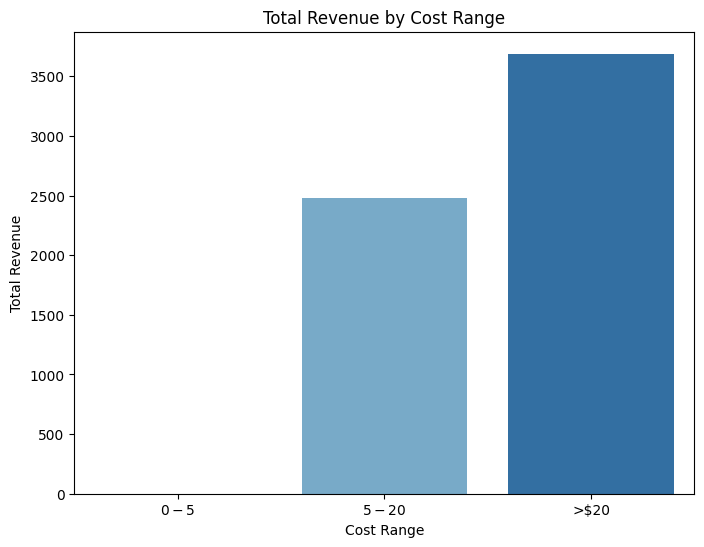

In [ ]:
# Categorizing orders into cost ranges
df['cost_range'] = pd.cut(df['cost_of_the_order'],
                          bins=[0, 5, 20, float('inf')],
                          labels=['$0-$5', '$5-$20', '>$20'],
                          ordered=True)

revenue_by_range = df.groupby('cost_range', observed=True)['revenue'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='cost_range', y='revenue', data=revenue_by_range,
            hue='cost_range', dodge=False, palette='Blues')


plt.legend([], [], frameon=False)

plt.title('Total Revenue by Cost Range')
plt.xlabel('Cost Range')
plt.ylabel('Total Revenue')


plt.show()


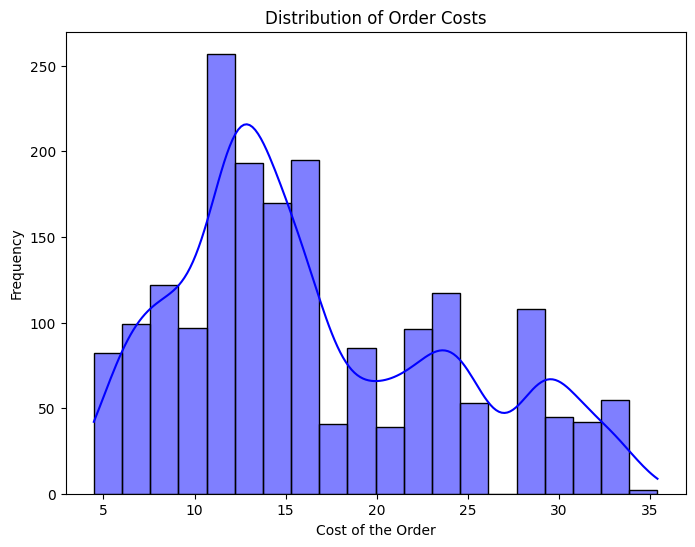

In [ ]:
# Histogram with KDE to visualize the distribution of order costs
plt.figure(figsize=(8, 6))
sns.histplot(df['cost_of_the_order'], kde=True, color='Blue', bins=20)
plt.title('Distribution of Order Costs')
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')
plt.show()


#### Observations:
# 1. Total Net Revenue:

- The company generated a total net revenue of **$6166.30** from all orders.

## Revenue by Cost Range:

- The bar plot shows that orders with a cost greater than **$20** contribute the most to the total revenue.

- Orders over **$20** generate approximately **$3500**.

- Orders between **$5** and **$20** contribute around **$2500** in revenue.

- Orders costing **$5 or less** do not generate revenue, as no commission is applied to these orders.

## Graph 2 Analysis: Distribution of Order Costs:

- The distribution of order costs indicates that most orders fall within the **$10 to $15** range.

- Although fewer orders exceed **$20**, they have a greater impact on revenue due to the **25% commission rate**.

- This suggests that even though high-cost orders are less frequent, they significantly contribute to net revenue because of the higher commission applied to them.

## Overall Conclusion:

- The company generates the majority of its revenue from orders above **$20**, thanks to the **25% commission rate**.

- While orders between **$5 and $20** are more frequent, they contribute less to the total revenue due to the lower **15% commission rate**.

- To further increase revenue, the company could focus on boosting the number of high-cost orders.



### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# new column 'total_time' to store the sum of preparation and delivery times
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# number of orders with total time > 60 minutes
orders_above_60 = df[df['total_time'] > 60].shape[0]

# total number of orders
total_orders = df.shape[0]

# percentage of orders taking more than 60 minutes
percentage_above_60 = (orders_above_60 / total_orders) * 100

print(f'The percentage of orders that take more than 60 minutes is: {percentage_above_60:.2f}%')


The percentage of orders that take more than 60 minutes is: 10.54%


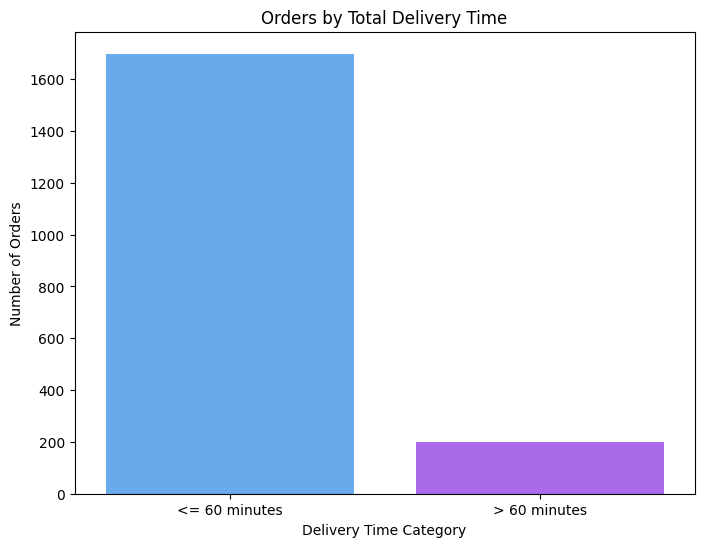

In [ ]:

#  new column to categorize orders
df['time_category'] = df['total_time'].apply(lambda x: '> 60 minutes' if x > 60 else '<= 60 minutes')

# Count the number of orders in each category
time_category_counts = df['time_category'].value_counts().reset_index()
time_category_counts.columns = ['time_category', 'count']


plt.figure(figsize=(8, 6))
sns.barplot(x='time_category', y='count', hue='time_category', dodge=False, data=time_category_counts, palette='cool')


plt.legend([], [], frameon=False)

plt.title('Orders by Total Delivery Time')
plt.xlabel('Delivery Time Category')
plt.ylabel('Number of Orders')


plt.show()


#### Observations:



Based on the analysis, **10.54% of the orders** take more than **60 minutes** from the time they are placed to the time they are delivered. The remaining majority, **89.46% of the orders**, are completed within **60 minutes**.

### **Bar Plot Summary**:
1. **<= 60 minutes**:  
   - Represents the vast majority of orders, indicating that the delivery process is generally efficient.

2. **> 60 minutes**:  
   - While these longer delivery times are less common, they still represent a significant **10.54%** of total orders.  
   - This percentage suggests some room for improvement, possibly by optimizing the food preparation or delivery processes to minimize delays.

### **Conclusion**:
The company performs well with most orders delivered within an hour. However, to further enhance customer satisfaction, focusing on reducing the **10.54% of orders exceeding 60 minutes** could improve the overall service experience. This analysis indicates that even though longer deliveries are uncommon, addressing them could provide an opportunity to refine the company’s logistics and operational efficiency.



### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

  day_of_the_week  delivery_time
0         Weekday      28.340037
1         Weekend      22.470022


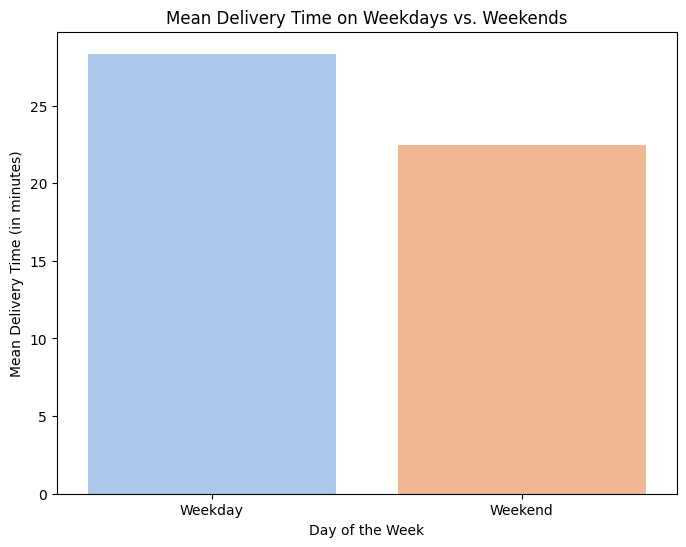

In [ ]:
#  Group by 'day_of_the_week' and calculate mean delivery time
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean().reset_index()

print(mean_delivery_time)


plt.figure(figsize=(8, 6))
sns.barplot(x='day_of_the_week', y='delivery_time', hue='day_of_the_week',
            dodge=False, data=mean_delivery_time, palette='pastel')

plt.legend([], [], frameon=False)


plt.title('Mean Delivery Time on Weekdays vs. Weekends')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Delivery Time (in minutes)')


plt.show()



#### Observations:


Based on the results and visualization:

1. **Mean Delivery Time Comparison**:
   - On **weekdays**, the average delivery time is **28.34 minutes**.
   - On **weekends**, the average delivery time is **22.47 minutes**.

2. **Observations from the Graph**:
   - The **mean delivery time** on weekdays is higher compared to weekends by approximately **6 minutes**.
   - This suggests that delivery times tend to be **faster on weekends**. The reduced traffic or lower order volume on weekends might contribute to faster deliveries.

3. **Conclusion**:
   - The company could **leverage the faster delivery times on weekends** in its marketing strategy, highlighting improved delivery performance on weekends.
   - If operational delays are causing longer delivery times on weekdays, optimizing delivery logistics for weekdays could further improve the service experience.



### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:

# Order Patterns and Preferences:

- **American, Japanese, and Italian cuisines** dominate customer preferences, particularly on weekends, reflecting cultural trends and possibly the popularity of these restaurants on the platform.

- **Lower-cost orders** are more frequent, with the majority of orders costing between **$10 and $15**. However, **29.24% of orders** cost over **$20**, providing a valuable opportunity for premium offerings.

# Customer Loyalty and Engagement:

- The **top 3 customers** are frequent users of the platform, placing **9 to 13 orders**. Offering these customers **personalized rewards** could further enhance engagement and loyalty.
- Restaurants with **more than 50 reviews** and **ratings above 4** are eligible for the promotional offer. Promoting these well-reviewed restaurants will likely improve the company’s brand and **customer retention**.

# Revenue and Business Impact:


- The majority of the revenue is generated from **orders costing more than $20**, with a **25% commission** applied. Although fewer in number, these **high-value orders** have a significant impact on the company’s overall revenue.

- **Orders between $5 and $20** are more frequent but contribute less to the revenue due to a lower **15% commission rate**.

# Operational Efficiency and Delivery Performance:

- **10.54% of the orders** exceed **60 minutes** from placement to delivery, indicating potential room for improvement in **logistics or preparation time**.
- **Delivery times on weekdays** are longer (**28.34 minutes** on average) than on **weekends (22.47 minutes)**, suggesting that operational efficiency is better on weekends, possibly due to **lower traffic or fewer orders**.



### Recommendations:

## 1. Promote High-Rated and Popular Restaurants:
- Focus on advertising **Shake Shack, The Meatball Shop, and Blue Ribbon Sushi**, which have both high ratings and engagement. Promoting these restaurants will attract more customers and increase overall order volume.

## 2. Enhance Customer Loyalty Programs:
- Offer **personalized rewards to frequent customers** (e.g., those with over **10 orders**) to encourage further engagement. For example, **20% discount vouchers** could incentivize customers to order more frequently.

## 3. Optimize Weekday Operations:
- Since **delivery times are longer on weekdays**, the company should analyze bottlenecks in **delivery logistics and preparation times** during those days. A focus on **optimizing delivery operations for weekdays** could enhance the customer experience.

## 4. Leverage Weekend Performance in Marketing Campaigns:
- Promote the platform’s **faster weekend delivery times** to attract customers. Marketing campaigns could highlight the company’s **improved delivery speed on weekends** to encourage more weekend orders.

## 5. Increase Focus on High-Cost Orders:
- Since **orders above $20** contribute significantly to the revenue, the company could introduce **premium services or offers** to increase the number of high-cost orders. This could include **bundle deals or exclusive menus**.

## 6. Address Delays in Orders Exceeding 60 Minutes:
- **Reducing the percentage of orders** that take more than **60 minutes** would further improve customer satisfaction. The company could **analyze bottlenecks in preparation and delivery** to minimize delays.

---

[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/Colab Notebooks/MIT/1_proyecto /foodhub_order.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Eq